# Predicting House Rent with Size 

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline 
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils.validation import check_is_fitted 



# Prepare Data

# Data Wrangling

In [84]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    low, high = df["Size"].quantile([0.1, 0.9])
    mask_area = df["Size"].between(low, high)
    mask_area
    return df

In [85]:
df = pd.read_csv("House_Rent_Dataset.csv")

In [86]:
df.shape

(4746, 12)

In [87]:
df.rename(columns ={"Rent":"Rent_in_USD","Posted On":"Posted_On",
                         "Area Type": "Area_Type", "Area Locality":"Area_Locality", 
                         "Furnishing Status":"Furnishing_Status", 
                         "Tenant Preferred":"Tenant_Preferred", 
                         "Point of Contact":"Point_of_Contact"}, inplace = True)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted_On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent_in_USD        4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area_Type          4746 non-null   object
 6   Area_Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing_Status  4746 non-null   object
 9   Tenant_Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point_of_Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [89]:
df.head(10)

,Posted_On,BHK,Rent_in_USD,Size,Floor,Area_Type,Area_Locality,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point_of_Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [90]:
df.describe()

,BHK,Rent_in_USD,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [91]:
df.duplicated().sum()

0

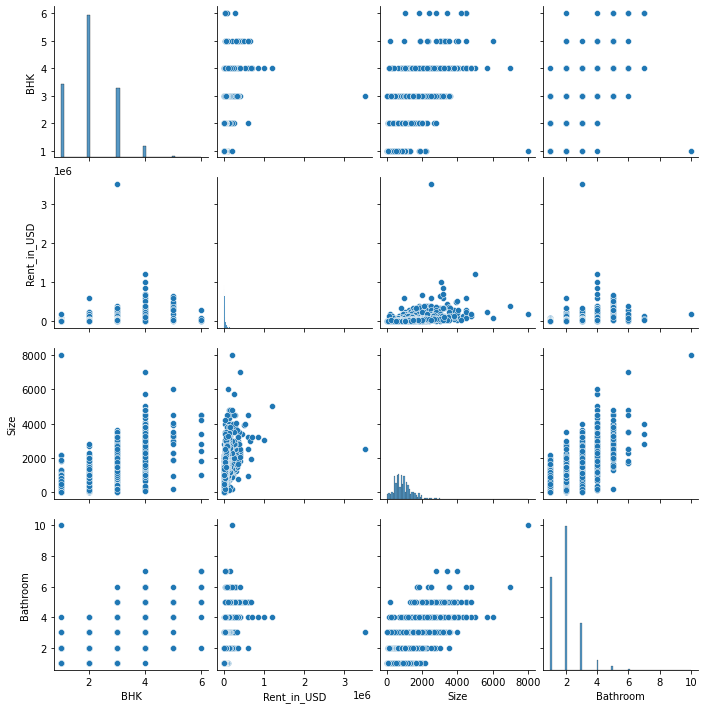

In [92]:
sns.pairplot(df)
plt.show()

In [93]:
# Checking for missing value or NaN in the columns 
df.isnull().sum()

Posted_On            0
BHK                  0
Rent_in_USD          0
Size                 0
Floor                0
Area_Type            0
Area_Locality        0
City                 0
Furnishing_Status    0
Tenant_Preferred     0
Bathroom             0
Point_of_Contact     0
dtype: int64

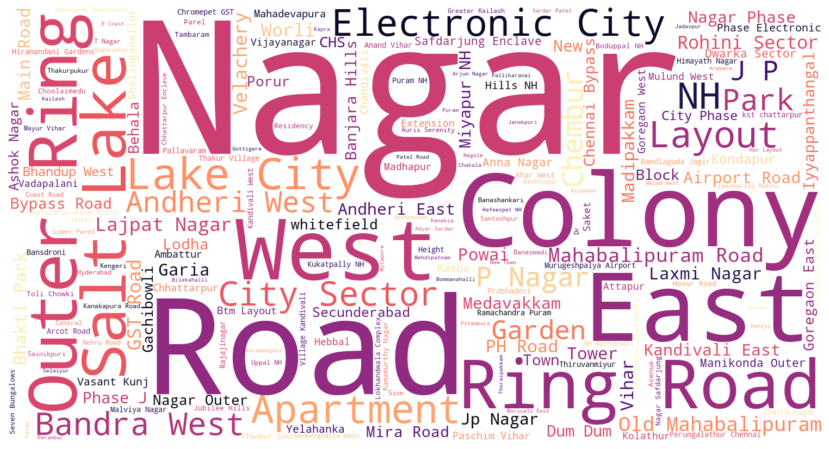

In [94]:
text = " ".join(area for area in df["Area_Locality"])
wordcloud = WordCloud(background_color = "white",
                     max_words= 200,
                     width= 1500,
                     height= 800,
                     colormap= "magma").generate(text)
plt.figure(figsize=(32, 8))
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

In [95]:
print("Mean of House Rent:", round(df["Rent_in_USD"].mean(), 2))
print("Median of House Rent:", round(df["Rent_in_USD"].median(), 2))
print("Least Expensive House Rent:", round(df["Rent_in_USD"].min(), 2))
print("Most Expensive House Rent:", round(df["Rent_in_USD"].max(), 2))

Mean of House Rent: 34993.45
Median of House Rent: 16000.0
Least Expensive House Rent: 1200
Most Expensive House Rent: 3500000


In [96]:
df["Point_of_Contact"].head()

0    Contact Owner
1    Contact Owner
2    Contact Owner
3    Contact Owner
4    Contact Owner
Name: Point_of_Contact, dtype: object

In [97]:
df["Posted_On"].head()

0    2022-05-18
1    2022-05-13
2    2022-05-16
3    2022-07-04
4    2022-05-09
Name: Posted_On, dtype: object

In [100]:
df["City"].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [101]:
df["City"].nunique()

6

In [102]:
df["City"].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

In [103]:
df["Area_Locality"].unique()

array(['Bandel', 'Phool Bagan, Kankurgachi', 'Salt Lake City Sector 2',
       ..., 'BN Reddy Nagar', 'Godavari Homes, Quthbullapur',
       'Manikonda, Hyderabad'], dtype=object)

In [104]:
df["Area_Locality"].nunique()

2235

In [105]:
df["Area_Type"].nunique()

3

In [106]:
df["Area_Type"].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [107]:
df["Area_Type"].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area_Type, dtype: int64

In [108]:
df[["Area_Type", "Area_Locality", "City"]].describe()

,Area_Type,Area_Locality,City
count,4746,4746,4746
unique,3,2235,6
top,Super Area,Bandra West,Mumbai
freq,2446,37,972


In [109]:
df["Rent_in_USD"].sort_values(ascending=False).head(5)

1837    3500000
1001    1200000
827     1000000
1329     850000
1459     700000
Name: Rent_in_USD, dtype: int64

In [110]:
df["Rent_in_USD"].sort_values(ascending=True).head(5)

4076    1200
285     1500
471     1800
2475    2000
146     2200
Name: Rent_in_USD, dtype: int64

In [111]:
df["Rent_in_USD"].describe()

count    4.746000e+03
mean     3.499345e+04
std      7.810641e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent_in_USD, dtype: float64

In [112]:
df["Rent_in_USD"].nunique()

243

In [113]:
df["Rent_in_USD"].head()

0    10000
1    20000
2    17000
3    10000
4     7500
Name: Rent_in_USD, dtype: int64

# Exploratory Data Analysis

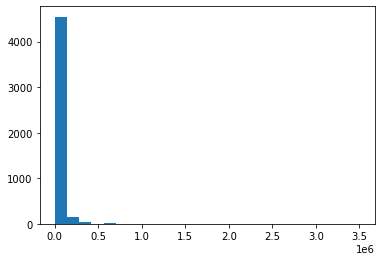

In [114]:
plt.hist(df["Rent_in_USD"], bins=25);

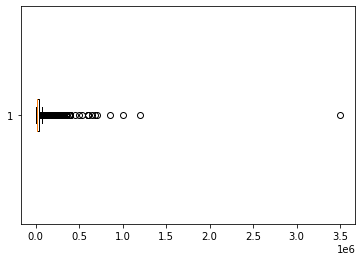

In [116]:
plt.boxplot(df["Rent_in_USD"], vert=False);

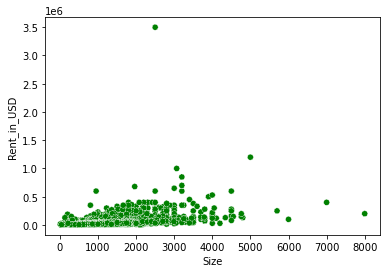

In [117]:
sns.scatterplot(x="Size", y="Rent_in_USD", data=df, linestyles="--", color="green");

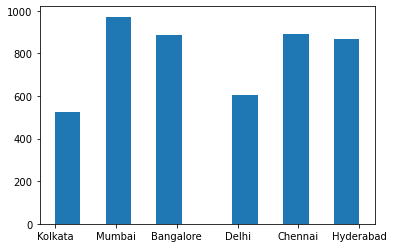

In [118]:
plt.hist(df["City"], bins = 12);

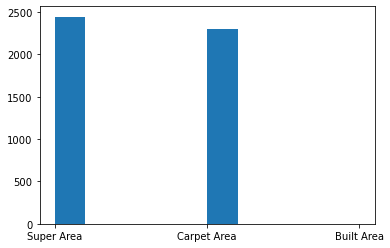

In [119]:
plt.hist(df["Area_Type"]);

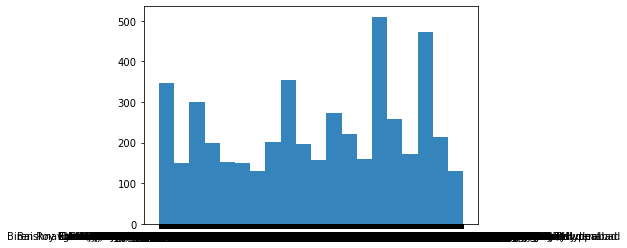

In [120]:
plt.hist(df["Area_Locality"], bins = 20, alpha = 0.9, rwidth=True);

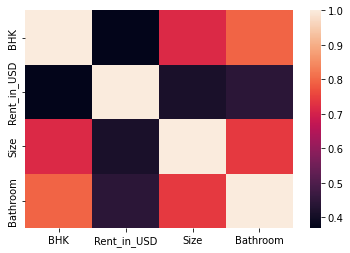

In [37]:
sns.heatmap(df.corr());

In [124]:
correlation = df.select_dtypes("number").drop(columns = "Rent_in_USD").corr()
correlation

,BHK,Size,Bathroom
BHK,1.000000,0.716145,0.794885
Size,0.716145,1.000000,0.740703
Bathroom,0.794885,0.740703,1.000000


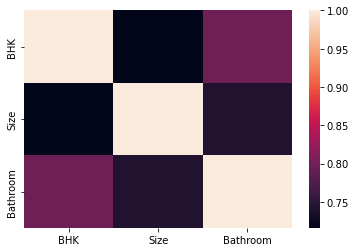

In [126]:
sns.heatmap(correlation);

In [127]:
df["Furnishing_Status"].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

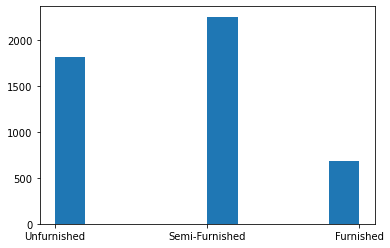

In [128]:
plt.hist(df["Furnishing_Status"]);

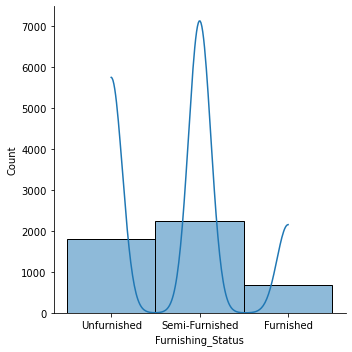

In [129]:
sns.displot(df["Furnishing_Status"], kde=True);

# Research Question 1

# Which City has the most expensive House Rent?

In [130]:
# Using groupby method to create a "mean_house_rent_by_city"
mean_house_rent_by_city = df.groupby("City")["Rent_in_USD"].mean().sort_values(ascending = False)
mean_house_rent_by_city

City
Mumbai       85321.204733
Delhi        29461.983471
Bangalore    24966.365688
Chennai      21614.092031
Hyderabad    20555.048387
Kolkata      11645.173664
Name: Rent_in_USD, dtype: float64

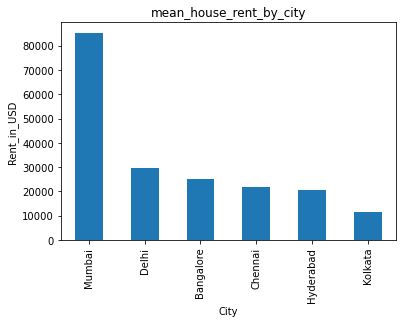

In [131]:
# Creating bar chart using mean_house_rent_by_city
mean_house_rent_by_city.plot(kind = "bar", xlabel = "City", ylabel = "Rent_in_USD", title ="mean_house_rent_by_city");

In [45]:
# From the bar chart above it is clear that City influences the cost of house rent.

# Research Question 2

# Is there a relationship between House Size and Rent_in_USD

In [132]:
df.describe()["Size"]

count    4746.000000
mean      967.490729
std       634.202328
min        10.000000
25%       550.000000
50%       850.000000
75%      1200.000000
max      8000.000000
Name: Size, dtype: float64

In [133]:
df["Size"].sort_values(ascending=False).head()

4185    8000
4457    7000
3622    6000
2048    5700
1001    5000
Name: Size, dtype: int64

In [134]:
df["Size"].sort_values(ascending=False).tail()

3922    25
2913    25
2460    25
116     20
4653    10
Name: Size, dtype: int64

In [135]:
low, high = df["Size"].quantile([0.1, 0.9])
mask_area = df["Size"].between(low, high)
mask_area.head()

0    True
1    True
2    True
3    True
4    True
Name: Size, dtype: bool

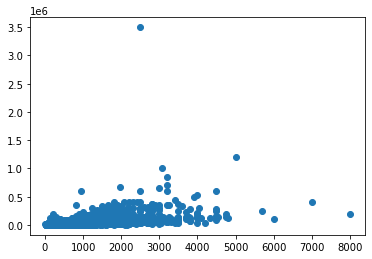

In [136]:
plt.scatter(x =df["Size"], y = df["Rent_in_USD"]);

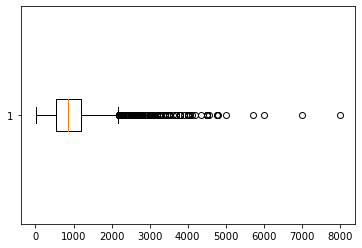

In [137]:
plt.boxplot(df["Size"], vert=False);

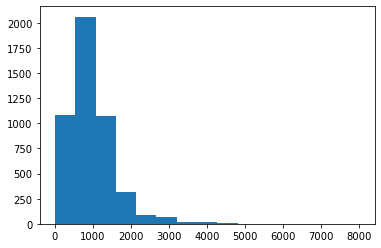

In [138]:
plt.hist(df["Size"], bins=15, rwidth = True);

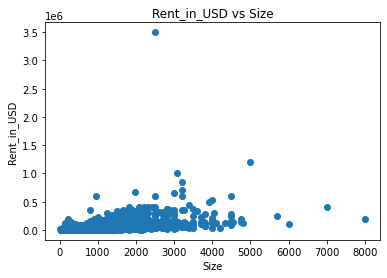

In [139]:
# Checking relationship between House Size and Rent cost 
plt.scatter(x=df["Size"], y=df["Rent_in_USD"])
plt.xlabel("Size")
plt.ylabel("Rent_in_USD")
plt.title("Rent_in_USD vs Size");

In [140]:
# Checking for correlation coefficient between the Size of the house and the house Rent 
correlation = df["Size"].corr(df["Rent_in_USD"])
correlation

0.4135507582245195

In [141]:
'''This result shows that there is little relationship between the Size
    of the house and the rent price in USD. It shows that there are other
    factors influencing the cost of the rent of a house'''

'This result shows that there is little relationship between the Size\n    of the house and the rent price in USD. It shows that there are other\n    factors influencing the cost of the rent of a house'

In [142]:
# checking to see if there is relationship between house size in Mumbai and the cost of rent
df_Mumbai = df[df["City"]== "Mumbai"]

In [143]:
df_Mumbai.head()

,Posted_On,BHK,Rent_in_USD,Size,Floor,Area_Type,Area_Locality,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point_of_Contact
524,2022-05-16,1,25000,320,2 out of 7,Super Area,"Shaheen Apartment, Andheri West",Mumbai,Semi-Furnished,Bachelors/Family,1,Contact Owner
525,2022-06-14,2,70000,750,4 out of 10,Carpet Area,Santacruz West,Mumbai,Furnished,Bachelors/Family,2,Contact Agent
526,2022-05-26,1,45000,450,7 out of 10,Carpet Area,"Rose Queen, Old Khar",Mumbai,Furnished,Bachelors/Family,1,Contact Agent
527,2022-05-27,3,75000,1100,2 out of 13,Carpet Area,"Sabari Palm View, Chembur",Mumbai,Unfurnished,Family,3,Contact Agent
528,2022-06-07,1,14000,640,6 out of 7,Super Area,Mira Road,Mumbai,Furnished,Bachelors/Family,1,Contact Owner


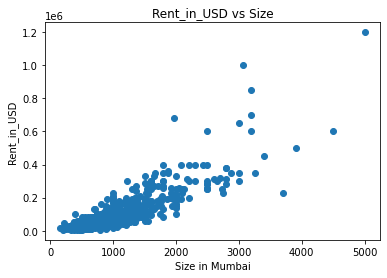

In [144]:
plt.scatter(x=df_Mumbai["Size"], y=df_Mumbai["Rent_in_USD"])
plt.xlabel("Size in Mumbai")
plt.ylabel("Rent_in_USD")
plt.title("Rent_in_USD vs Size");

In [145]:
# plotting for correlation in house sizes in Mumbai city and the cost of rent
correlation_Mumbai = df_Mumbai["Size"].corr(df_Mumbai["Rent_in_USD"])
correlation_Mumbai

0.8551644608888175

In [146]:
''' plotting for correlation in house sizes in Mumbai city and the cost of rent.
    The correlation coefficient above shows a very strong relationship between house 
    size in Mumbai and the cost of rent
    '''

' plotting for correlation in house sizes in Mumbai city and the cost of rent.\n    The correlation coefficient above shows a very strong relationship between house \n    size in Mumbai and the cost of rent\n    '

In [147]:
df_Delhi = df[df["City"] == "Delhi"]
df_Delhi.head()

,Posted_On,BHK,Rent_in_USD,Size,Floor,Area_Type,Area_Locality,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point_of_Contact
2382,2022-06-24,2,14000,800,1 out of 3,Super Area,"Keshav Puram, Tri Nagar",Delhi,Semi-Furnished,Bachelors/Family,2,Contact Owner
2383,2022-06-30,1,20000,200,Ground out of 2,Super Area,Hauz Khas,Delhi,Furnished,Bachelors,1,Contact Owner
2384,2022-06-26,3,80000,1800,1 out of 3,Carpet Area,South Extension 1,Delhi,Semi-Furnished,Bachelors/Family,3,Contact Owner
2385,2022-06-08,1,9500,400,2 out of 4,Carpet Area,Neb Sarai,Delhi,Unfurnished,Bachelors/Family,1,Contact Agent
2386,2022-06-08,3,14000,600,2 out of 4,Carpet Area,kst chattarpur Apartments,Delhi,Unfurnished,Bachelors,3,Contact Agent


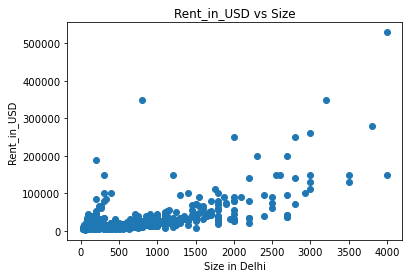

In [148]:
plt.scatter(x=df_Delhi["Size"], y=df_Delhi["Rent_in_USD"])
plt.xlabel("Size in Delhi")
plt.ylabel("Rent_in_USD")
plt.title("Rent_in_USD vs Size");

In [149]:
# plotting for correlation in house sizes in Delhi city and the cost of rent
correlation_Delhi = df_Delhi["Size"].corr(df_Delhi["Rent_in_USD"])
correlation_Delhi

0.6217738093144862

In [150]:
''' plotting for correlation in house sizes in Delhi city and the cost of rent.
    The correlation coefficient above shows a strong relationship between house 
    size in Delhi and the cost of rent
    '''

' plotting for correlation in house sizes in Delhi city and the cost of rent.\n    The correlation coefficient above shows a strong relationship between house \n    size in Delhi and the cost of rent\n    '

In [151]:
df_Kolkata = df[df["City"] == "Kolkata"]
df_Kolkata.head()

,Posted_On,BHK,Rent_in_USD,Size,Floor,Area_Type,Area_Locality,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point_of_Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


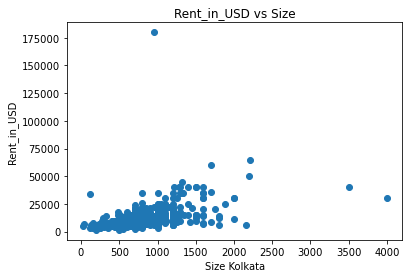

In [152]:
plt.scatter(x=df_Kolkata["Size"], y=df_Kolkata["Rent_in_USD"])
plt.xlabel("Size Kolkata")
plt.ylabel("Rent_in_USD")
plt.title("Rent_in_USD vs Size");

In [153]:
# plotting for correlation in house sizes in Kolkata city and the cost of rent
correlation_Kolkata = df_Kolkata["Size"].corr(df_Kolkata["Rent_in_USD"])
correlation_Kolkata

0.479699835392572

In [154]:
''' plotting for correlation in house sizes in Kolkata city and the cost of rent.
    The correlation coefficient above shows a weak relationship between house 
    size in Kolkata and the cost of rent
    '''

' plotting for correlation in house sizes in Kolkata city and the cost of rent.\n    The correlation coefficient above shows a weak relationship between house \n    size in Kolkata and the cost of rent\n    '

In [155]:
df_Bangalore = df[df["City"] =="Bangalore"]
df_Bangalore.head()

,Posted_On,BHK,Rent_in_USD,Size,Floor,Area_Type,Area_Locality,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point_of_Contact
1496,2022-06-30,3,70000,3354,Ground out of 16,Carpet Area,Talagatta Pura,Bangalore,Furnished,Bachelors/Family,3,Contact Agent
1497,2022-06-23,2,10500,800,3 out of 4,Super Area,Nagappa Reddy layout-Dooravani Nagar,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
1498,2022-07-04,2,13000,1000,Ground out of 4,Super Area,"Kattigenahalli, Bellary Road",Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
1499,2022-06-04,2,17000,1040,4 out of 4,Super Area,C V Raman Nagar,Bangalore,Furnished,Bachelors/Family,2,Contact Owner
1500,2022-06-04,3,21000,1403,1 out of 4,Super Area,"Chikkalasandra, Bangalore",Bangalore,Semi-Furnished,Bachelors/Family,3,Contact Owner


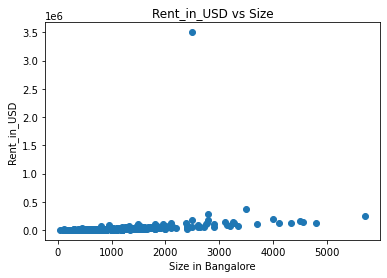

In [156]:
plt.scatter(x=df_Bangalore["Size"], y=df_Bangalore["Rent_in_USD"])
plt.xlabel("Size in Bangalore")
plt.ylabel("Rent_in_USD")
plt.title("Rent_in_USD vs Size");

In [157]:
# plotting for correlation in house sizes in Kolkata city and the cost of rent
correlation_Bangalore = df_Bangalore["Size"].corr(df_Bangalore["Rent_in_USD"])
correlation_Bangalore

0.2582188755671524

In [158]:
''' plotting for correlation in house sizes in Bangalore city and the cost of rent.
    The correlation coefficient above shows a very weak relationship between house 
    size in Bangalore and the cost of rent
    '''

' plotting for correlation in house sizes in Bangalore city and the cost of rent.\n    The correlation coefficient above shows a very weak relationship between house \n    size in Bangalore and the cost of rent\n    '

In [159]:
df_Chennai = df[df["City"] =="Chennai"]
df_Chennai.head()

,Posted_On,BHK,Rent_in_USD,Size,Floor,Area_Type,Area_Locality,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point_of_Contact
2987,2022-07-06,2,15000,1100,1 out of 2,Super Area,Medavakkam,Chennai,Semi-Furnished,Bachelors,2,Contact Owner
2988,2022-05-21,2,6500,1000,Ground out of 1,Super Area,"Urapakkam, Vandalur R.F, GST Road",Chennai,Semi-Furnished,Bachelors/Family,2,Contact Owner
2989,2022-05-20,3,90000,2400,1 out of 3,Carpet Area,"R.A Puram, Mandaiveli",Chennai,Semi-Furnished,Bachelors/Family,3,Contact Agent
2990,2022-07-10,3,200000,3000,1 out of 1,Super Area,Madras Boat Club Road,Chennai,Furnished,Family,4,Contact Agent
2991,2022-06-25,1,15000,650,Ground out of 2,Carpet Area,Kambar Colony,Chennai,Semi-Furnished,Bachelors/Family,1,Contact Owner


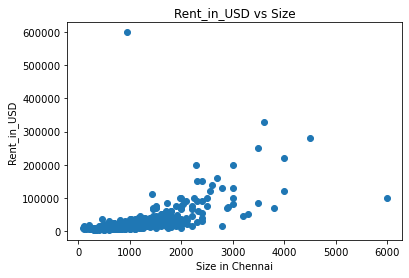

In [160]:
plt.scatter(x=df_Chennai["Size"], y=df_Chennai["Rent_in_USD"])
plt.xlabel("Size in Chennai")
plt.ylabel("Rent_in_USD")
plt.title("Rent_in_USD vs Size");

In [161]:
# plotting for correlation in house sizes in Kolkata city and the cost of rent
correlation_Chennai = df_Chennai["Size"].corr(df_Chennai["Rent_in_USD"])
correlation_Chennai

0.5935267285508677

In [162]:
''' plotting for correlation in house sizes in Delhi city and the cost of rent.
    The correlation coefficient above shows a strong relationship between house 
    size in Delhi and the cost of rent
    '''

' plotting for correlation in house sizes in Delhi city and the cost of rent.\n    The correlation coefficient above shows a strong relationship between house \n    size in Delhi and the cost of rent\n    '

In [163]:
df_Hyderabad = df[df["City"] =="Hyderabad"]
df_Hyderabad.head()

,Posted_On,BHK,Rent_in_USD,Size,Floor,Area_Type,Area_Locality,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point_of_Contact
3878,2022-06-28,4,75000,3800,3 out of 10,Carpet Area,"Financial District, Nanakram Guda",Hyderabad,Semi-Furnished,Bachelors/Family,4,Contact Agent
3879,2022-06-30,4,250000,4500,Ground out of 2,Carpet Area,Jubilee Hills,Hyderabad,Semi-Furnished,Family,4,Contact Agent
3880,2022-05-20,2,10000,1100,1 out of 3,Super Area,Meerpet,Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
3881,2022-07-10,3,60000,3200,1 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
3882,2022-05-12,2,12000,647,2 out of 3,Super Area,Moti Nagar,Hyderabad,Unfurnished,Bachelors/Family,1,Contact Owner


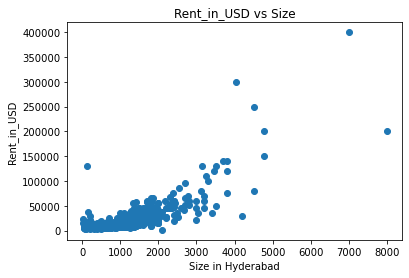

In [164]:
plt.scatter(x=df_Hyderabad["Size"], y=df_Hyderabad["Rent_in_USD"])
plt.xlabel("Size in Hyderabad")
plt.ylabel("Rent_in_USD")
plt.title("Rent_in_USD vs Size");

In [165]:
# plotting for correlation in house sizes in Kolkata city and the cost of rent
correlation_Hyderabad = df_Hyderabad["Size"].corr(df_Hyderabad["Rent_in_USD"])
correlation_Hyderabad

0.755480808783645

In [166]:
''' plotting for correlation in house sizes in Hyderabad city and the cost of rent.
    The correlation coefficient above shows a strong relationship between house 
    size in Hyderabad and the cost of rent
    '''

' plotting for correlation in house sizes in Hyderabad city and the cost of rent.\n    The correlation coefficient above shows a strong relationship between house \n    size in Hyderabad and the cost of rent\n    '

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted_On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent_in_USD        4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area_Type          4746 non-null   object
 6   Area_Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing_Status  4746 non-null   object
 9   Tenant_Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point_of_Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


# Data Splitting 

In [168]:
features = ["Size"]
target = "Rent_in_USD"
X_train = df[features]
y_train = df[target]

In [171]:
X_train.shape

(4746, 1)

In [173]:
y_train.shape

(4746,)

# Building Model

# Baseline

In [174]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[34993.45132743363,
 34993.45132743363,
 34993.45132743363,
 34993.45132743363,
 34993.45132743363]

In [176]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean Rent Price:", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean Rent Price: 34993.45
Baseline MAE: 31133.75


# Iterate 

In [177]:
model = make_pipeline(
  OneHotEncoder(),
  LinearRegression()    
)

In [178]:
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('linearregression', LinearRegression())])

# Evaluation 

In [179]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 20152.64


 # Communicate the Results       

In [180]:
intercept = model.named_steps["linearregression"].intercept_.round()
coefficient =  model.named_steps["linearregression"].coef_.round()
